# 선형모델

- 선형 모델은 과거부터 지금까지 널리 사용되고 연구되고 있는 "기계학습방법"
- 입력데이터에 대한 선형함수를 만들어 예측 수행
- 회귀분석을 위한 선형 모델은 다음과 같이 정의 : y_hat(w,x) = w0 + w1x1 + ... + wpxp
- x : 데이터
- w : 모델이 학습할 파라미터, 기울기 파라미터, 가중치 
- w0:편향(bias)
- w1~wp : 가중치

### 회귀분석(Regression)
- 회귀분석은 주어딘 데이터가 어떤 함수로부터 생성됐는가를 알아보는 ‘함수 관계’를 추측하는 것 입니다.
- 가설(방정식이) 몇차 방정식인지? 그리고 계수는 각각 무엇인지 알아보는 것입니다.
- 이 방정식의 계수가 선형이면 선형 회귀 분석(Linear Regression Analysis)
-  중에서도 방정식의 변수가 여러개 이면 다중 선형 회귀 분석(Multiple Linear Regression Analysis)

### 선형 회귀(Linear Regression)
- 선형 회귀(Linear Regression)또는 최소제곱법(Ordinary Least Squares)은 가장 간단한 회귀분석을 위한 선형모델
- 모델의 예측(y_hat)과 정답(y)을 빼고 제곱을 한 평균제곱오차를 최소화하는 학습 파라미터 w를 찾음
- 선형회귀모델에서 사용하는 다양한 오류 측정 방법 
    - MAE
    - MAPE
    - MSE(Mean Squared Error) : 가장 많이 씀
    - MPE

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

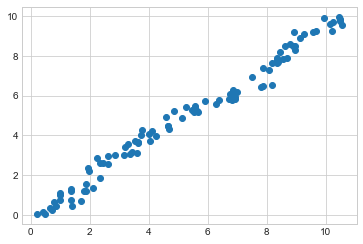

In [3]:
noise = np.random.rand(100,1)
X = sorted(10 * np.random.rand(100, 1)) + noise # 0~1사이의 난수 생성 # 여러개의 피쳐가 있으면 대문자로 
y = sorted(10 * np.random.rand(100))

plt.scatter(X,y);

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# 기울기 파차미터w,가중치(coef)와 절편(intercept)
print('선형 회귀 가중치:{}'.format(model.coef_)) # w1~wp
print('선형 회귀 편향:{}'.format(model.intercept_)) # w0

선형 회귀 가중치:[0.94250573]
선형 회귀 편향:-0.042704590563373834


In [15]:
print('학습 데이터 점수:{}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수:{}'.format(model.score(X_test, y_test)))

학습 데이터 점수:0.9840725811538793
평가 데이터 점수:0.966018444009667


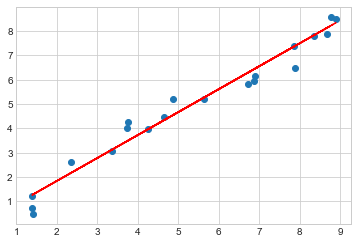

In [17]:
predict = model.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test, predict,'r--')

### 보스턴 주택 가격 데이터
- 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
- 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
- 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성
- 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. - - Economics & Management"에서 보스턴 데이터가 사용

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [2]:
import pandas as pd

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


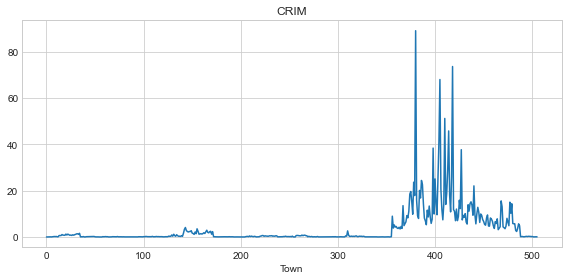

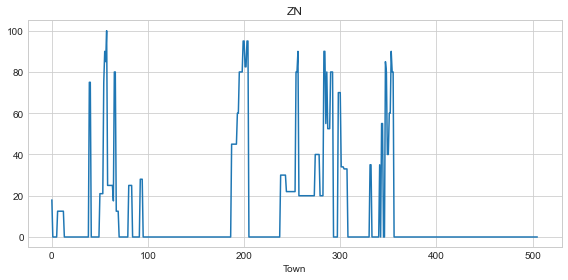

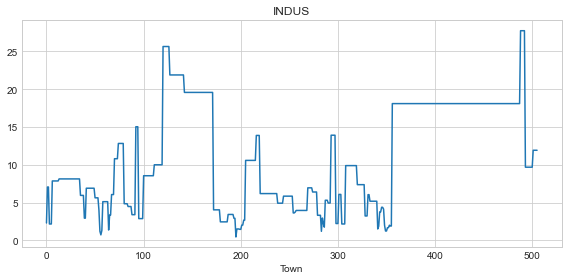

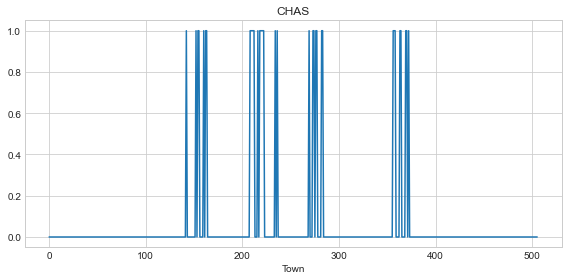

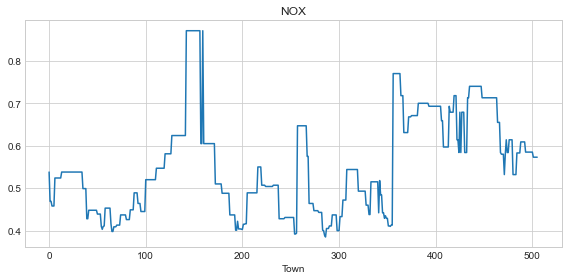

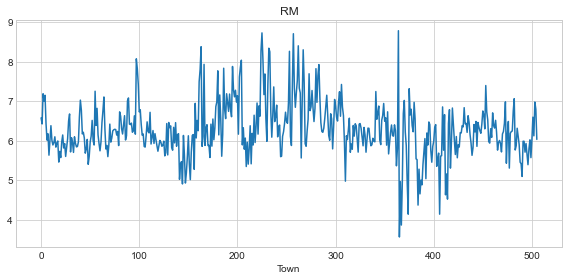

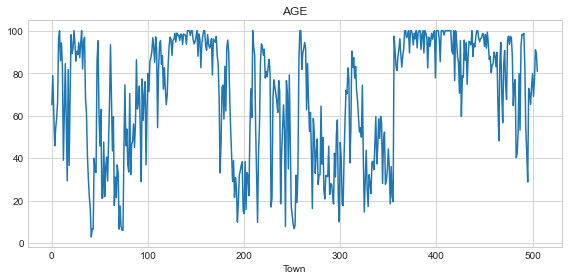

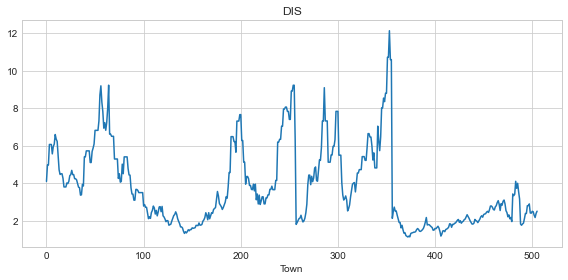

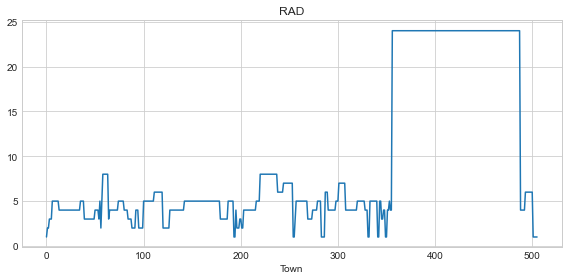

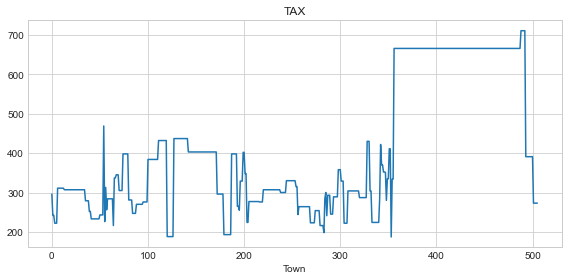

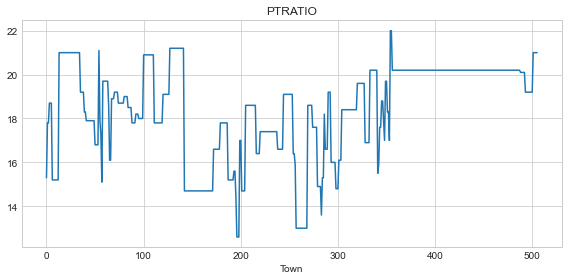

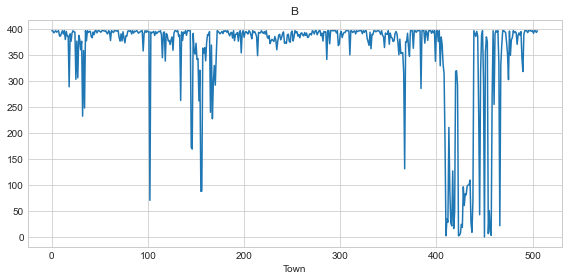

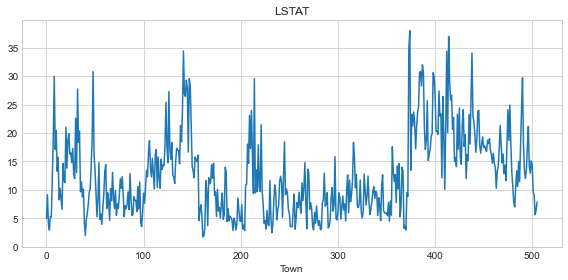

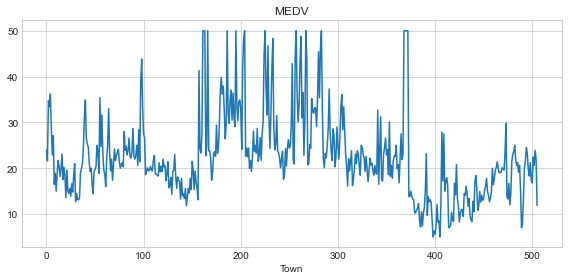

In [7]:
# 시각화해서 데이터 파악하기
for i, col in enumerate(boston_df.columns): # enumerate 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환
    plt.figure(figsize=(8,4))
    plt.plot(boston_df[col])
    plt.title(col)
    plt.xlabel('Town')
    plt.tight_layout()

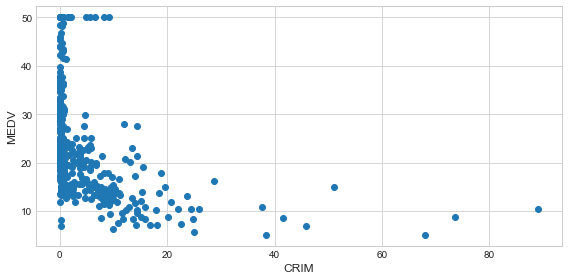

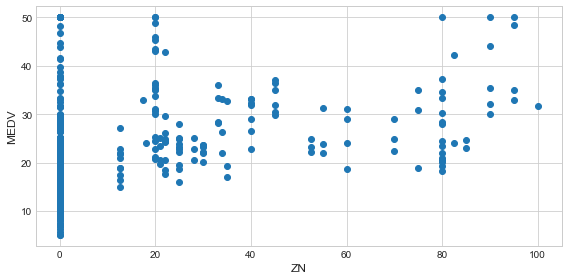

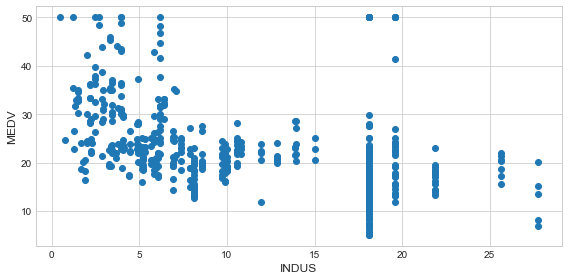

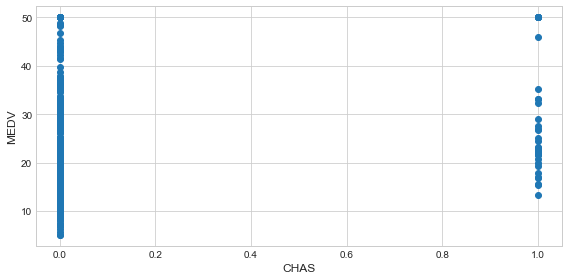

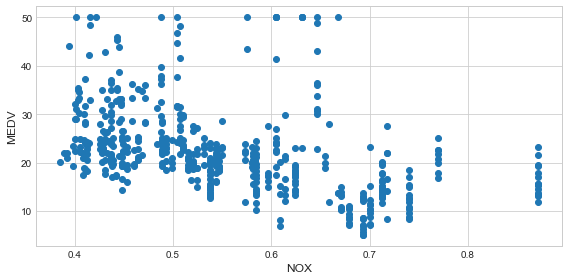

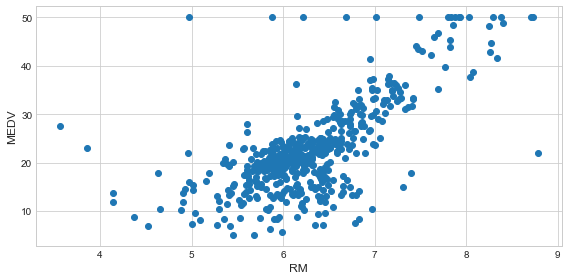

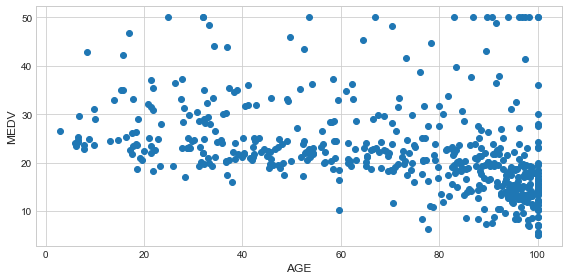

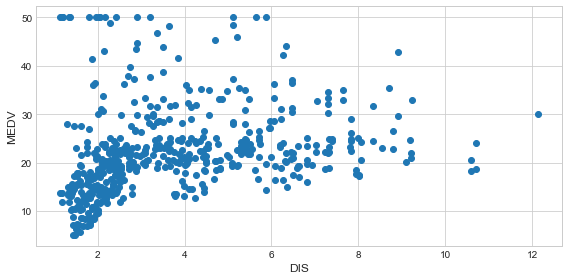

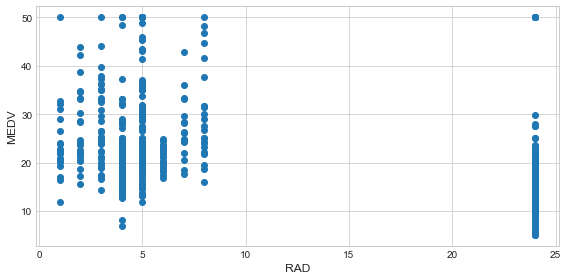

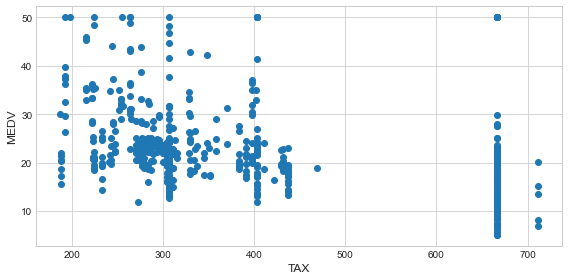

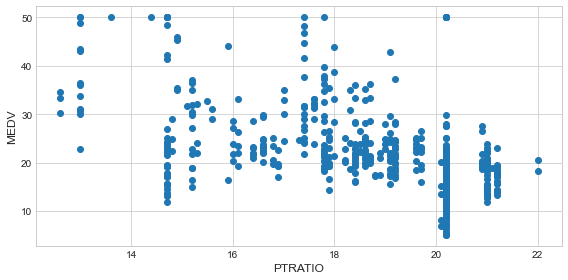

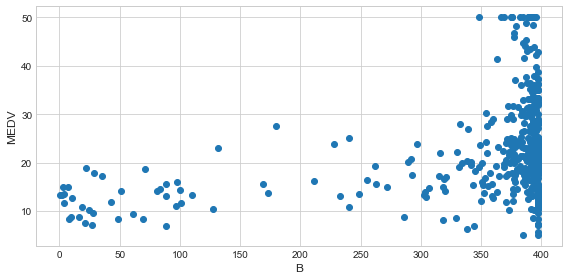

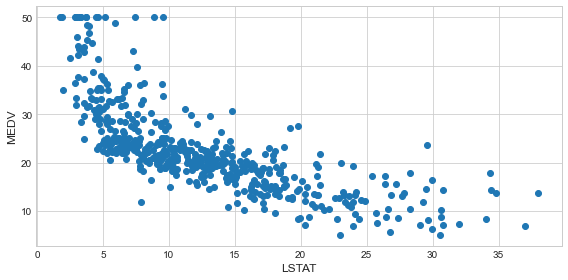

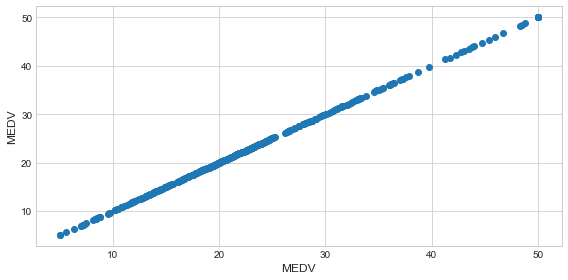

In [8]:
# y값을 MEDV 중앙값으로 지정해서 중앙값과 각 컬럼의 상관관계를 시각화해서 데이터 파악하기
for i, col in enumerate(boston_df.columns): # enumerate 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환
    plt.figure(figsize=(8,4))
    plt.scatter(boston_df[col], boston_df['MEDV'])
    plt.ylabel('MEDV', size=12)
    plt.xlabel(col, size=12)
    plt.tight_layout()